#Imports e configurações do Ambiente

In [6]:
import matplotlib.pyplot as plt
from glob import glob
import numpy as np

In [ ]:
#!pip install opencv-python==3.4.2.17
#!pip install opencv-contrib-python==3.4.2.17

In [4]:
import cv2 as cv
from google.colab.patches import cv2_imshow

#Questões
link para as respostas teoricas de cada questão: https://docs.google.com/document/d/1cJ9dPaQPMyttU0oDMBqfDBpWsuaWY_LzPEsIKuZND4A/edit

#Questão 1

- Enunciado:

  Na documentação da OpenCV é possível encontrar diversos detectores e descritores

1. Usando um conjunto com pelo menos 6 imagens (você
pode tirar fotos com seu telefone, por exemplo), experimente três detectores
distintos nestas imagens, incluindo o detector de Harris. Pesquise e descreva
resumidamente com suas palavras (até 200 palavras para cada) como cada
um funciona, incluindo seus parâmetros e quais suas principais diferenças.
Exiba resultados nas suas imagens, e em quais situações cada um funciona bem ou mal. Discuta seus parâmetros. Qual deles você achou melhor? Justifique.

In [ ]:
!mkdir -p /content/images/q1/
!wget -q https://thumbs.dreamstime.com/b/magasin-de-gomme-moscou-12716345.jpg -O /content/images/q1/img1.jpg
!wget -q https://media.australian.museum/media/dd/images/Junonia_villida_calybe.width-800.364148f.jpg -O /content/images/q1/img2.jpg
!wget -q https://assets.themortgagereports.com/wp-content/uploads/2020/12/Buy-A-Home-With-Low-No-Down-Payment-First-Time-Home-Buyer.jpg -O /content/images/q1/img3.jpg
!wget -q https://cf.shopee.com.br/file/dac859e3c6d611ed3171f5fb6c5722c1 -O /content/images/q1/img4.jpg
!wget -q https://static.vecteezy.com/system/resources/thumbnails/002/859/080/small_2x/colorful-90s-seamless-pattern-free-vector.jpg -O /content/images/q1/img5.jpg
!wget -q https://static.todamateria.com.br/upload/bo/sj/bosjes001-cke.jpg -O /content/images/q1/img6.jpg

In [ ]:
def harrisDetector(image, gray):

    imgArr = np.float32(gray)
    dst = cv.cornerHarris(imgArr, 2, 3, 0.04)
    dst = cv.dilate(dst, None)
    image[dst > 0.01 * dst.max()] = [0, 255, 255]
    return image


def shiTomasiDetector(image, gray):

    corners = cv.goodFeaturesToTrack(gray, 255, 0.01, 10)
    corners = np.int0(corners)
    for i in corners:
        x, y = i.ravel()
        cv.circle(image, (x, y), 3, (0, 255, 255), 2)
    return image


def fastDetector(image, gray):

    fast = cv.FastFeatureDetector_create()
    # print(fast.getThreshold()) default is 10
    fast.setThreshold(60)
    fast.setNonmaxSuppression(0)
    kp = fast.detect(gray, None)  # keypoints
    return cv.drawKeypoints(image, kp, None, color=(0, 255, 255))


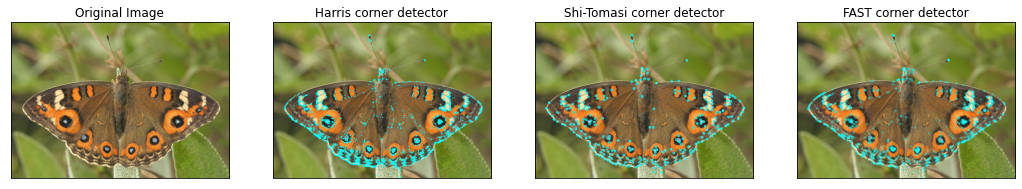

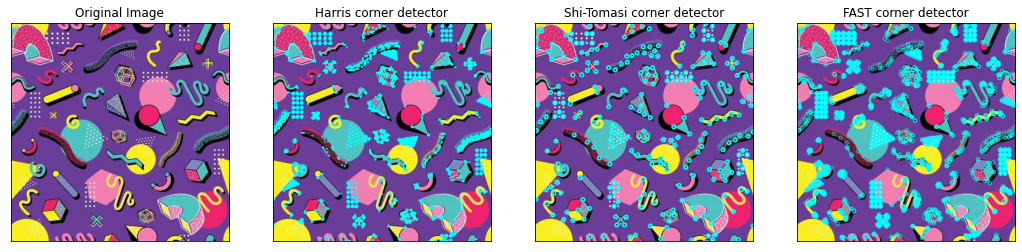

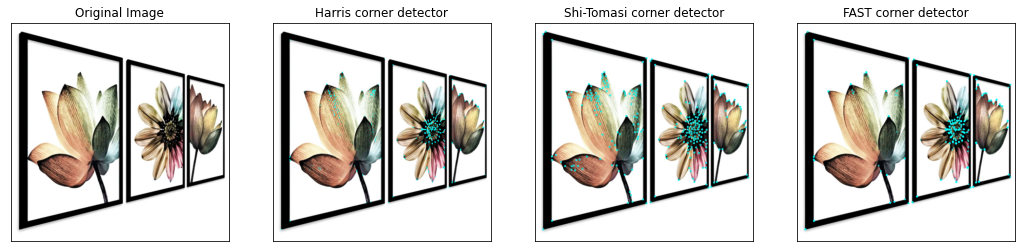

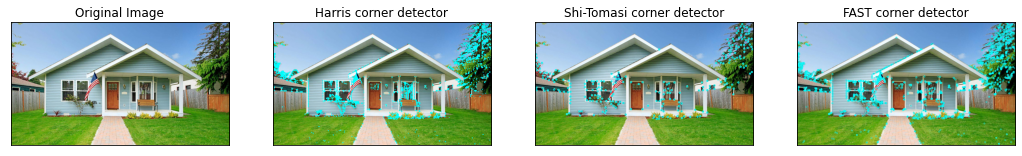

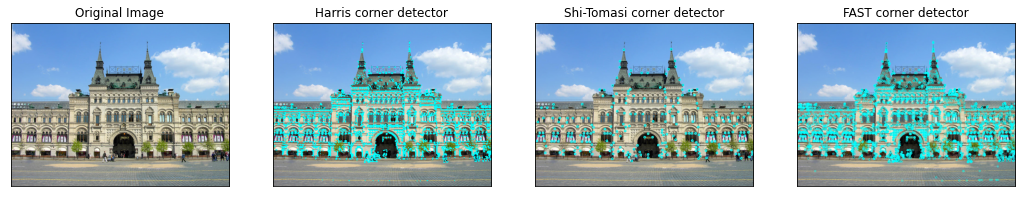

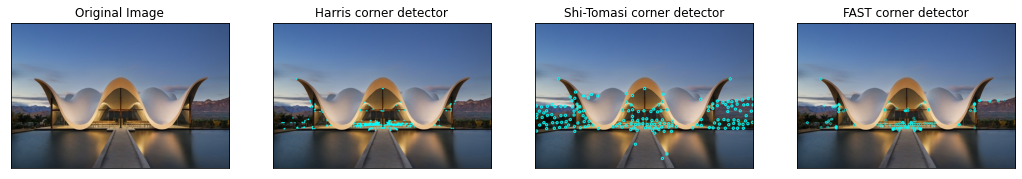

In [ ]:
for index, path in enumerate(glob("/content/images/q1/*")):

  plt.figure(figsize = (18, 25))
  image = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)
  gray = cv.cvtColor(image,cv.COLOR_RGB2GRAY)

  plt.subplot(index+1, 4, 1)
  plt.imshow(image.copy())
  plt.title(f"Original Image")
  plt.xticks([])
  plt.yticks([])

  plt.subplot(index+1, 4, 2)
  plt.imshow( harrisDetector( image.copy(), gray ) )
  plt.title(f"Harris corner detector")
  plt.xticks([])
  plt.yticks([])
  
  plt.subplot(index+1, 4, 3)
  plt.imshow( shiTomasiDetector( image.copy(), gray ) )
  plt.title(f"Shi-Tomasi corner detector")
  plt.xticks([])
  plt.yticks([])

  plt.subplot(index+1, 4, 4)
  plt.imshow( fastDetector( image.copy(), gray ) )
  plt.title(f"FAST corner detector")
  plt.xticks([])
  plt.yticks([])

  plt.show()

#Questão 2

Repita o mesmo procedimento acima para 3 tipos de descritores,
incluindo o SIFT.

In [ ]:
def sift(image, gray):

    sift = cv.xfeatures2d.SIFT_create()
    kp = sift.detect(gray, None)

    return cv.drawKeypoints(
        image,
        kp,
        None,
        color=(255, 255, 0),
        flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
    )


def surf(image, gray, threshold):

    surf = cv.xfeatures2d.SURF_create(400)
    surf.setHessianThreshold(threshold)
    
    surf.setUpright(True)
    kp, des = surf.detectAndCompute(gray, None)
    return cv.drawKeypoints(image, kp, None, (255, 0, 255), 4)


def brief(image, gray):

    star = cv.xfeatures2d.StarDetector_create()
    brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
    kp = star.detect(gray, None)
    kp, des = brief.compute(gray, kp)
    return cv.drawKeypoints(image, kp, None, (255, 0, 0), 4)


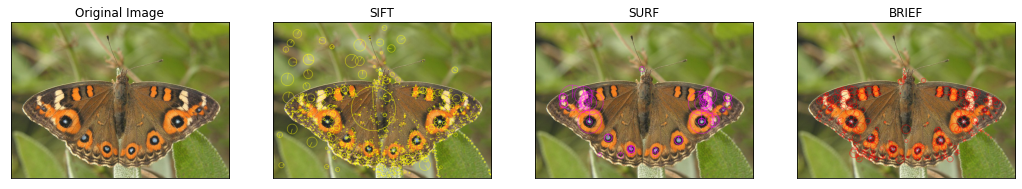

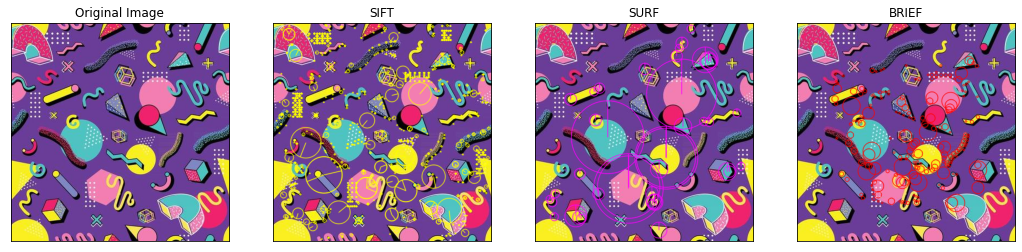

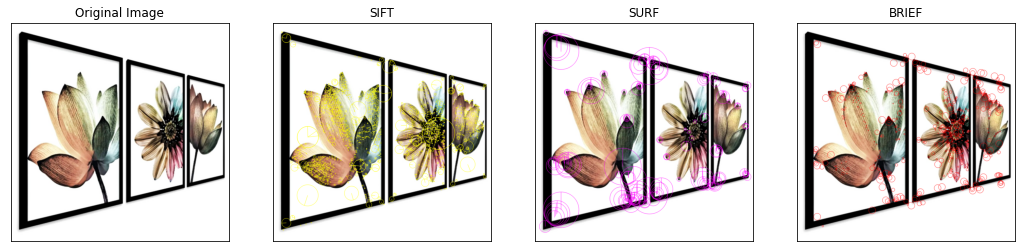

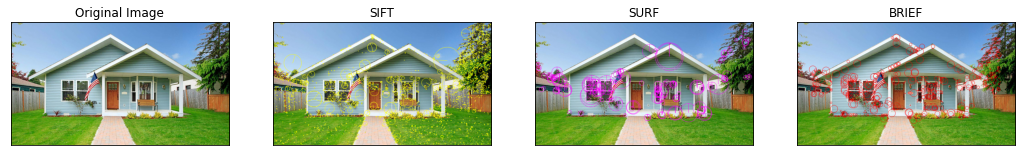

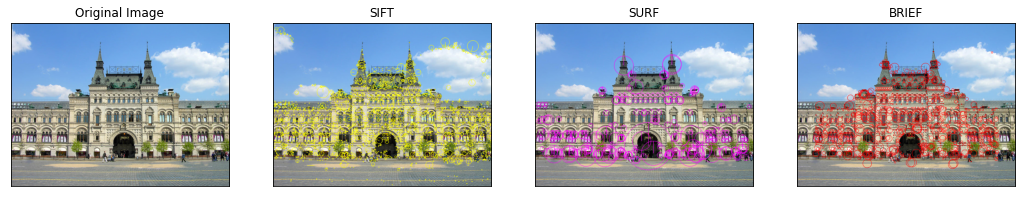

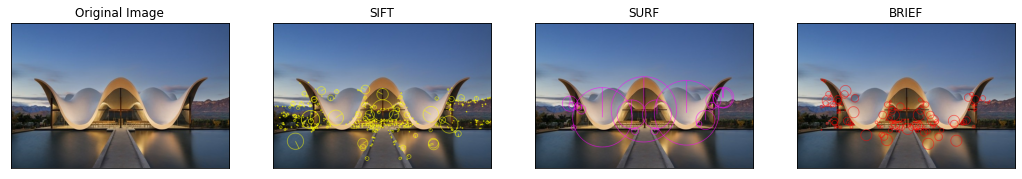

In [ ]:
surfThreshold = [10000,10000,20000,8000,10000,7000]

for index, path in enumerate(glob("/content/images/q1/*")):

  plt.figure(figsize = (18, 25))
  image = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)
  gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)

  plt.subplot(index+1, 4, 1)
  plt.imshow(image.copy())
  plt.title("Original Image")
  plt.xticks([])
  plt.yticks([])

  plt.subplot(index+1, 4, 2)
  plt.imshow(sift( image.copy(), gray ))
  plt.title("SIFT")
  plt.xticks([])
  plt.yticks([])
  
  plt.subplot(index+1, 4, 3)
  plt.imshow( surf( image.copy(), gray, surfThreshold[index] ) )
  plt.title("SURF")
  plt.xticks([])
  plt.yticks([])

  plt.subplot(index+1, 4, 4)
  plt.imshow( brief( image.copy(), gray ) )
  plt.title("BRIEF")
  plt.xticks([])
  plt.yticks([])

#Questão 3

Repita o mesmo procedimento acima para 3 algoritmos de geração
de correspondências (matching).

In [ ]:
# !rm -rfv /content/images/q3/
!mkdir -p /content/images/q3/
!wget -q https://d1pkzhm5uq4mnt.cloudfront.net/imagens/capas/_68dca4352cd0aa10fd3e1de985b0f1fd45e5e948.jpg -O /content/images/q3/item1.jpg
!wget -q https://www.solivros.com.br/product_images/p/338/historia-do-brasil-barsa-4-livros__51526_std.jpg -O /content/images/q3/scene1.jpg
# !wget -q https://imgs.pontofrio.com.br/1533322875/1xg.jpg?imwidth=400 -O /content/images/q3/scene1.jpg
!wget -q https://www.canoas.rs.gov.br/wp-content/uploads/2018/10/1808.png -O /content/images/q3/item2.jpg
!wget -q https://cdn1.rondoniagora.com/uploads/noticias/2011/05/16/582f6882d31ae.jpg -O /content/images/q3/scene2.jpg
!wget -q "https://encrypted-tbn2.gstatic.com/shopping?q=tbn:ANd9GcTzXk5RzPbqAi9qwyEX1E4fQrdv4PiAmcxoVXZRvM6M46dIWU4SJodnxn3JyWza-CG0eK-HaBUSGPk3JSWclcFmY2I5o4-_LZXXQKAyq1R62GQ1MrdHD0nTGw&usqp=CAE" -O /content/images/q3/item3.jpg
!wget -q https://a-static.mlcdn.com.br/618x463/tupperware-garrafa-termica-inox-outdoor-12-litros-azul/chefetupperware/mcc3zyrfk/b06bf7ef3b4afe441eb0dc8e80455ad7.jpg -O /content/images/q3/scene3.jpg
!wget -q https://farmaciaindiana.vteximg.com.br/arquivos/ids/243776-272-388/COPO-STANLEY-SALMAO.jpg?v=637641970922030000 -O /content/images/q3/item4.jpg
!wget -q https://ciclovivo.com.br/wp-content/uploads/2022/02/Copo-Stanley-o-que-podemos-aprender-com-a-moda-696x465.jpeg -O /content/images/q3/scene4.jpg
!wget -q https://static8.depositphotos.com/1026550/1072/i/600/depositphotos_10727732-stock-photo-egg-with-clipping-path.jpg -O /content/images/q3/item5.jpg
!wget -q https://www.comprerural.com/wp-content/uploads/2020/08/cartela-de-ovos--640x414.jpg -O /content/images/q3/scene5.jpg
!wget -q https://cf.shopee.com.br/file/0c4ae4a5c013074eb1ef068c5c4be023 -O /content/images/q3/item6.jpg
!wget -q https://m.media-amazon.com/images/I/61r4nGuMBoL._AC_SY450_.jpg -O /content/images/q3/scene6.jpg

In [ ]:
def bfMatcherORB(item, grayItem, scene, grayScene):

    orb = cv.ORB_create()
    kp1, des1 = orb.detectAndCompute(grayItem, None)
    kp2, des2 = orb.detectAndCompute(grayScene, None)
    bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)
    return cv.drawMatches(
        item,
        kp1,
        scene,
        kp2,
        matches[:10],
        None,
        flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
    )
  
def bfMatcherSIFT(item, grayItem, scene, grayScene):

  sift = cv.xfeatures2d.SIFT_create()
  kp1, des1 = sift.detectAndCompute(grayItem,None)
  kp2, des2 = sift.detectAndCompute(grayScene,None)
  bf = cv.BFMatcher()
  matches = bf.knnMatch(des1,des2,k=2)
  good = []
  for m,n in matches:
      if m.distance < 0.75*n.distance:
          good.append([m])
  return cv.drawMatchesKnn(
        item,
        kp1,
        scene,
        kp2,
        good,
        None,
        flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
      )

def flannMatcherSIFT(item, grayItem, scene, grayScene):
  
  sift = cv.xfeatures2d.SIFT_create()
  kp1, des1 = sift.detectAndCompute(item,None)
  kp2, des2 = sift.detectAndCompute(scene,None)
  FLANN_INDEX_KDTREE = 1
  index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
  search_params = dict(checks=50)
  flann = cv.FlannBasedMatcher(index_params,search_params)
  matches = flann.knnMatch(des1,des2,k=2)
  matchesMask = [[0,0] for i in range(len(matches))]
  for i,(m,n) in enumerate(matches):
      if m.distance < 0.7*n.distance:
          matchesMask[i]=[1,0]
  draw_params = dict(matchColor = (0,255,0),
                    singlePointColor = (255,0,0),
                    matchesMask = matchesMask,
                    flags = cv.DrawMatchesFlags_DEFAULT)
  return cv.drawMatchesKnn(
        item,
        kp1,
        scene,
        kp2,
        matches,
        None,
        **draw_params
      )

In [ ]:
fig_sizes = [(50, 10), (50, 40), (50, 30),(50, 40), (70, 50), (90, 70)]

for index, path in enumerate(glob("/content/images/q3/item*")):

  item = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB)
  scene = cv.cvtColor(cv.imread(path.replace("/content/images/q3/item", "/content/images/q3/scene")), cv.COLOR_BGR2RGB)
  grayItem = cv.cvtColor(item, cv.COLOR_RGB2GRAY)
  grayScene = cv.cvtColor(scene, cv.COLOR_RGB2GRAY)

  plt.figure(figsize = fig_sizes[index])

  plt.subplot(index+1, 3, 1)
  plt.imshow( bfMatcherORB( item.copy(), grayItem, scene.copy(), grayScene ) )
  plt.title("Brute-Force matcher with ORB detector", fontsize=25)
  plt.xticks([])
  plt.yticks([])
  
  plt.subplot(index+1, 3, 2)
  plt.imshow( bfMatcherSIFT( item.copy(), grayItem, scene.copy(), grayScene ) )
  plt.title("Brute-Force matcher with SIFT detector", fontsize=25)
  plt.xticks([])
  plt.yticks([])

  plt.subplot(index+1, 3, 3)
  plt.imshow( flannMatcherSIFT( item.copy(), grayItem, scene.copy(), grayScene ) )
  plt.title("FLANN matcher with SIFT detector", fontsize=25)
  plt.xticks([])
  plt.yticks([])

  plt.show()

Output hidden; open in https://colab.research.google.com to view.

#Questão 4
Escolha e descreva uma metodologia completa para geração de correspondências. Experimente 3 quantidades distintas de correspondências retornadas, variando parâmetros dos algoritmos. Aplique esta metodologia em duas imagens, exiba e discuta a qualidade dos resultados (correspondências
corretas vs. outliers). Estes resultados devem ser exibidos com segmentos
de reta entre imagens representando suas correspondências.

#Questão 5

Explique em palavras o que significa unicidade de pontos de interesse e mostre exemplos visuais usando 1 imagem.

#Questão 6

Aplique o filtro LoG em pelo menos 6 escalas distintas (você pode
usar a OpenCV). Em seguida, implemente um algoritmo que determina se
um pixel (x, y, s)  é um máximo local no espaço de posição-escala. Aplique este algoritmo em todos os pixels das imagens resultantes para encontrar
estes extremos, e pinte estes pixels de uma cor diferente. Exiba as imagens
resultantes. Obs.: você não precisa aplicar na imagem de menor e maior
escala, nem nos pixels do bordo da imagem, visto que eles não tem uma
vizinhança completa.

In [63]:
!mkdir -p /content/images/q6
!wget -q https://cdn.pixabay.com/photo/2014/09/16/15/40/zebra-448361_960_720.jpg -O /content/images/q6/img1.jpg
!wget -q http://upload.wikimedia.org/wikipedia/commons/0/0a/Zebra_zoo-leipzig.jpg -O /content/images/q6/img2.jpg

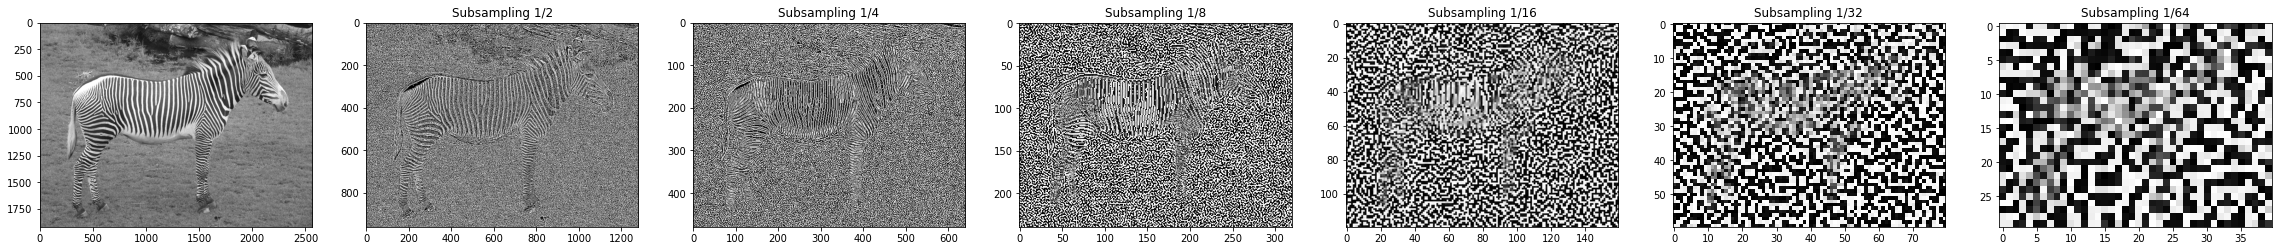

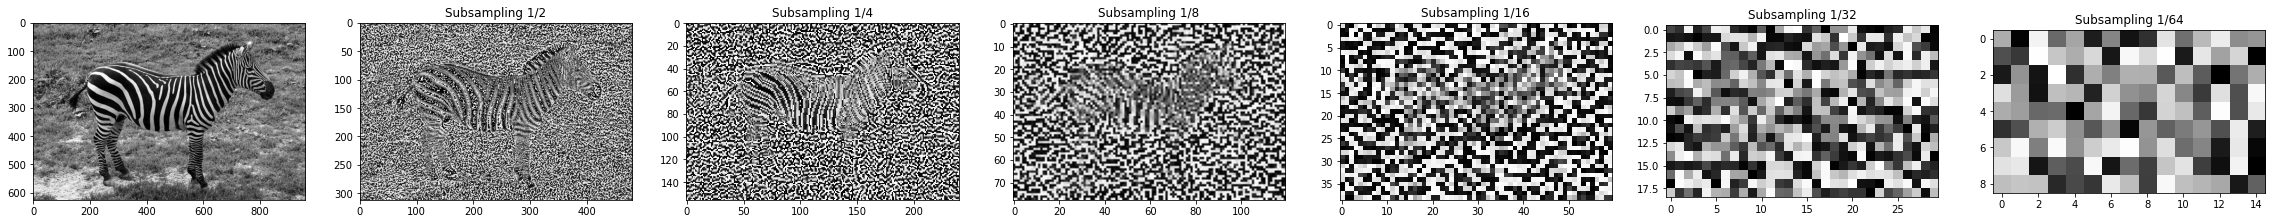

In [79]:
for path in glob("/content/images/q6/*"):
  
  img = cv.imread(path, cv.IMREAD_GRAYSCALE)
  rows, cols = img.shape[:2]
  plt.figure(figsize=(40,25))

  plt.subplot(1, 7, 1)
  plt.imshow(img, cmap='gray')

  for i in range(6):

    rows, cols = img.shape[:2]
    supImg = cv.resize(img, (cols//2, rows//2))
    blur = cv.GaussianBlur(supImg,(3,3), 0)
    laplacian = cv.Laplacian(blur, cv.CV_64F)
    laplacian1 = laplacian/laplacian.max()
    plt.subplot(1, 7, i+2)
    plt.imshow((laplacian1 * 255).astype(np.uint8), cmap='gray')
    plt.title(f"Subsampling 1/{(2 ** (i+1))}")
    img = laplacian1

  plt.show()